# Ice Cream Brand Analysis

The ice cream dataset consists of ice cream names, descriptions, ratings, ingredients, and reviews of four different ice cream brands: Ben & Jerry's, Häagen-Dazs, Breyers, and Talenti. The data is collected from each brand's website and is available on Kaggle for public use. 

As an ice cream enthusiast, I am greatly concerned with getting the best grocery store ice cream five dollars can buy, and without the time and money to taste each flavor from each brand, I often resort to my old favorites. In this project, I am to discover which flavors and brands are most popular and why, with hopes of reducing my time spent deliberating over the best option in the freezer section of the grocery store.

In this notebook, I visually and statistically analyze the differences in ratings and reviews between brands using several visualizations and a one-way ANOVA test.

## Exploratory Analysis


### Descriptive Tables
The dataset contains 57 flavors from Ben & Jerry's, 70 from Häagen-Dazs, 45 from Talenti, and 69 from Breyer's. Although these sample sizes vary slightly from brand to brand, the sample sizes are sufficiently large and close enough for appropriate analysis. Ben & Jerry's is the only brand that has data on the subheading, so this variable will not be very useful in comparison. 

In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("./icecream_data/combined/products.csv")
data.head()

,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


In [4]:
data.tail()

,brand,key,name,subhead,description,rating,rating_count,ingredients
236,breyers,64_breyers,CINNABON®,NaN,Calling all cinnamon roll lovers! We teamed up...,4.0,28,"MILK, CORN SYRUP, SUGAR, BROWN SUGAR, SOYBEAN ..."
237,breyers,65_breyers,CarbSmart™ Caramel Swirl Bar,NaN,Watching your grams of sugar or carbs? Try our...,4.7,18,"MILK, WATER, CARAMEL SWIRL, SUGAR, WATER, CORN..."
238,breyers,66_breyers,Layered Dessert S'mores,NaN,Calling all S'mores lovers! Make sure you don'...,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
239,breyers,67_breyers,Layered Dessert Peach Cobbler,NaN,Love peach cobbler topped with Breyers®? Then ...,3.2,38,"MILK, CORN SYRUP, ENRICHED WHEAT FLOUR, WHEAT ..."
240,breyers,68_breyers,Layered Dessert Brownie Cheesecake,NaN,Love brownie cheesecake? What about Breyers®? ...,2.8,25,"MILK, CORN SYRUP, SUGAR, ENRICHED WHEAT FLOUR,..."


In [5]:
data.loc[data['brand'] == 'hd']

,brand,key,name,subhead,description,rating,rating_count,ingredients
57,hd,0_hd,White Chocolate Raspberry Truffle Ice Cream,NaN,A truly exquisite ice cream inspired by fine c...,4.9,168,"CREAM, SKIM MILK, SUGAR, RASPBERRY PUREE, LACT..."
58,hd,1_hd,Banana Peanut Butter Chip Ice Cream,NaN,Ribbons of rich peanut butter and bits of choc...,4.7,80,"CREAM, SKIM MILK, SUGAR, PEANUTS, BANANA PUREE..."
59,hd,2_hd,Bourbon Praline Pecan Ice Cream,NaN,Treat yourself to ice cream infused with smoot...,4.1,191,"CREAM, SKIM MILK, SUGAR, BROWN SUGAR, EGG YOLK..."
60,hd,3_hd,Bourbon Vanilla Bean Truffle Ice Cream,NaN,"A classic pairing made even better, enjoy crea...",4.0,89,"CREAM, SKIM MILK, SUGAR, HONEY, EGG YOLKS, BRO..."
61,hd,4_hd,Butter Pecan Ice Cream,NaN,"An American classic, revisited with our passio...",4.3,111,"CREAM, SKIM MILK, SUGAR, PECANS, LACTOSE REDUC..."
...,...,...,...,...,...,...,...,...
122,hd,65_hd,Vanilla Milk Chocolate Ice Cream Bar,NaN,"Pure, sweet vanilla blends with sweet cream to...",4.6,76,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, VANILLA EX..."
123,hd,66_hd,Vanilla Milk Chocolate Almond Ice Cream Bar,NaN,"We start with pure, sweet vanilla and blend it...",2.5,224,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, MILK CHOCO..."
124,hd,67_hd,Vanilla Swiss Almond Ice Cream,NaN,An almond lover's delight. Our dry-roasted alm...,4.3,129,"CREAM, SKIM MILK, SUGAR, LACTOSE REDUCED SKIM ..."
125,hd,68_hd,Whiskey Hazelnut Latte Ice Cream,NaN,This new spiked latte inspired treat is a deli...,4.5,11,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, BROWN SUGA..."


In [6]:
data.loc[data['brand'] == 'talenti']

,brand,key,name,subhead,description,rating,rating_count,ingredients
127,talenti,0_talenti,ALPHONSO MANGO SORBETTO,NaN,Our simple and delicious Alphonso Mango Sorbet...,4.7,139,"MANGOS, WATER, SUGAR, DEXTROSE, LEMON JUICE, C..."
128,talenti,1_talenti,BANANA CARAMEL CRUNCH,NaN,This flavor was inspired by a classic southern...,4.2,25,"MILK, BANANAS, SUGAR†, WHEAT FLOUR, CREAM, NON..."
129,talenti,2_talenti,BELGIAN CHOCOLATE GELATO,NaN,Our Belgian Chocolate gelato is made with melt...,4.8,27,"MILK, SUGAR, CREAM, EGG AND EGG YOLK, DEXTROSE..."
130,talenti,3_talenti,BLACK RASPBERRY CHOCOLATE CHIP GELATO,NaN,"Tart and sweet, our Black Raspberry Chocolate ...",4.0,105,"MILK, SUGAR, CREAM, BLACK RASPBERRIES, DEXTROS..."
131,talenti,4_talenti,BLACK RASPBERRY VANILLA PARFAIT,NaN,This Layer was inspired by one of our favorite...,4.5,65,"MILK, SUGAR, CREAM, BLACK RASPBERRY PUREE, ROL..."
132,talenti,5_talenti,CARAMEL APPLE PIE GELATO,NaN,We start by steeping real cinnamon sticks in f...,4.8,115,"MILK, SUGAR, CREAM, DEXTROSE, SKIM MILK, WHEAT..."
133,talenti,6_talenti,CARAMEL COOKIE CRUNCH GELATO,NaN,This is one of our best-selling flavors that p...,4.2,334,"MILK, SUGAR, CREAM, SKIM MILK, COCONUT, PALM A..."
134,talenti,7_talenti,CARIBBEAN COCONUT GELATO,NaN,"Fresh milk, cream, sugar and vanilla come toge...",4.5,112,"MILK, SUGAR, CREAM, COCONUT CONCENTRATE, COCON..."
135,talenti,8_talenti,CHOCOLATE CHERRY CHEESECAKE,NaN,Cherry cheesecake is a classic dessert and we ...,4.3,77,"MILK, SUGAR, CREAM CHEESE (CREAM, MILK, CHEESE..."
136,talenti,9_talenti,CHOCOLATE CHIP COOKIE DOUGH GELATO,NaN,"We begin with our vanilla gelato, add chocolat...",2.8,104,"MILK, SUGAR, CREAM, WHEAT FLOUR, DEXTROSE, SKI..."


In [89]:
for brand in pd.unique(data['brand']):
    print(brand, ':', len(data.loc[data['brand'] == brand]))

bj : 57
hd : 70
talenti : 45
breyers : 69


Overall, we find that the average ice cream rating is 4.22 with a standard deviation of 0.62. It should be noted that the lowest rating is 1.2, which maybe be of particular interest in our analysis. The number of reviews are also described by the data set, with an average of about 90 reviews per ice cream, with a standard deviation of 111.35. The wide range may indicate that some flavors are much more popular or widely distributed.

In [7]:
data.describe()

,rating,rating_count
count,241.000000,241.000000
mean,4.223237,90.016598
std,0.620383,111.349449
min,1.200000,2.000000
25%,4.000000,28.000000
50%,4.400000,59.000000
75%,4.700000,112.000000
max,5.000000,983.000000


### Exploratory Plots

From the scatterplot below, we can see that most flavors have between 0 and 200 reviews, with ratings between 4 and 5. Ben & Jerry's seems to have several flavors with many more reviews than other brands. We can see that flavors with over about 350 reviews are highly rated, with a rating of 4 or more. This makes sense given the positive feedback loop of popular flavors: The flavors are either very good or highly promoted, making them desireable to consumers, drawing more reviews. More positive reviews will make ice cream producers market and distribute these flavors more widely, so more people purchase the flavor, and thus the feeback loop continues.

Text(0, 0.5, 'Rating')

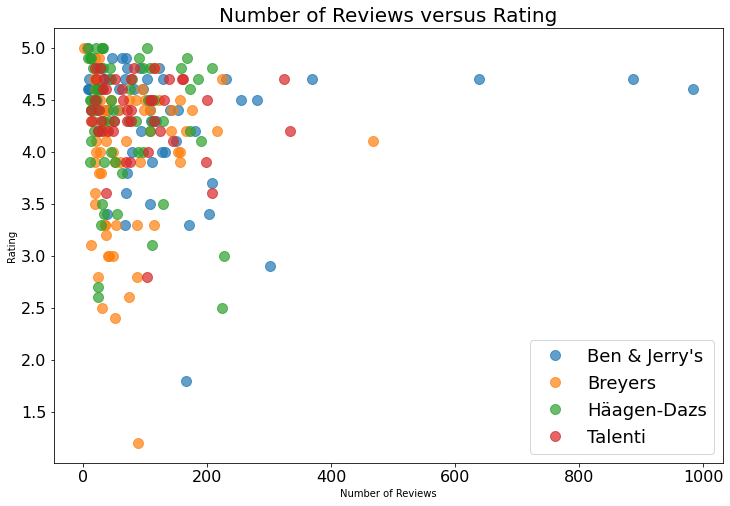

In [7]:
#group by brand
brands = data.groupby('brand')

#plot data by brand
plt.figure(figsize=(12,8))
for name, group in brands:
    plt.plot(group.rating_count, group.rating, marker='o', linestyle='', markersize=10, label=name, alpha = 0.7)
    
#change text size
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

#label plot
plt.title("Number of Reviews versus Rating")
plt.legend(['Ben & Jerry\'s', 'Breyers', 'Häagen-Dazs', 'Talenti'], fontsize = 18)
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')



Ben & Jerry's, Häagen-Dazs, and Talenti are all very close in median rating, with Breyers trailing behind, with slightly lower median rating. Notably, Ben & Jerry's, Häagen-Dazs, and Breyers all have flavors with the maximum rating score of 5. Although, Talenti doesn't reach the maximum, its small range may indicate a certain level of quality consistency among its flavors, while BEn & Jerry's and Breyers both have notably dud flavors with ratings below 2. 

[Text(0, 0, "Ben & Jerry's"),
 Text(1, 0, 'Häagen-Dazs'),
 Text(2, 0, 'Talenti'),
 Text(3, 0, 'Breyers')]

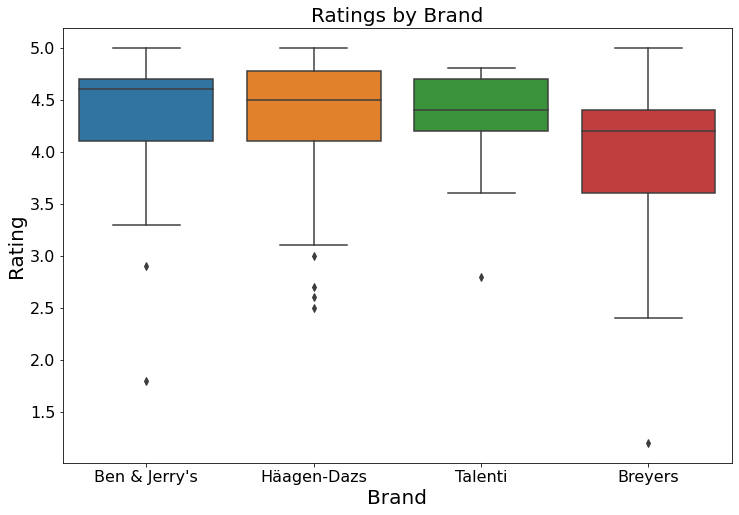

In [8]:
#set figure dimensions and font size
plt.figure(figsize=(12,8))
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

#create boxplot
ax = sns.boxplot(x=data['brand'], y=data['rating'])
plt.title("Ratings by Brand")
plt.xlabel('Brand')
plt.ylabel('Rating')
ax.set_xticklabels(['Ben & Jerry\'s', 'Häagen-Dazs', 'Talenti', 'Breyers'])





Ben & Jerry's ice cream appears to have more reviews, with several of the most reviewed ice cream flavors among all brands. Häagen-Dazs appears to have slightly fewer reviews than other brands, although these differences don't appear all that significant with the interquartile range for each brand falling between 0 and 200 reviews per ice cream.

[Text(0, 0, "Ben & Jerry's"),
 Text(1, 0, 'Häagen-Dazs'),
 Text(2, 0, 'Talenti'),
 Text(3, 0, 'Breyers')]

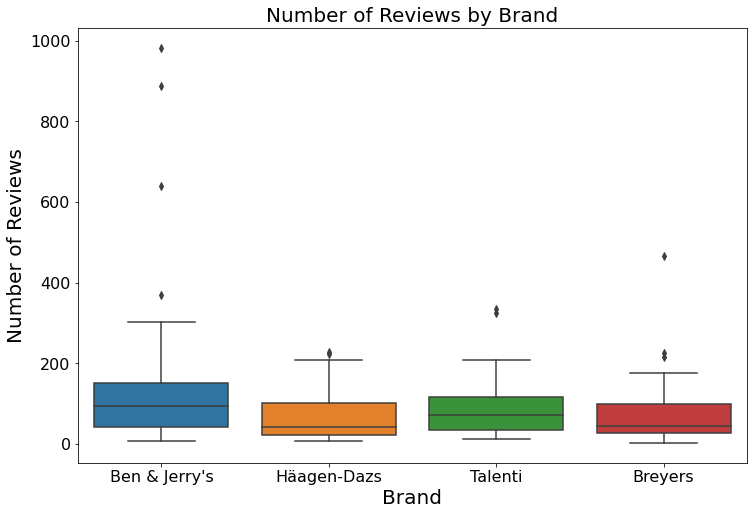

In [9]:
#set figure dimensions and font size
plt.figure(figsize=(12,8))
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

#create boxplot
ax = sns.boxplot(x=data['brand'], y=data['rating_count'])
plt.title("Number of Reviews by Brand")
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')
ax.set_xticklabels(['Ben & Jerry\'s', 'Häagen-Dazs', 'Talenti', 'Breyers'])

## One-Way ANOVA

Does one brand stand out above the rest? Using a one-way univariate ANOVA test, we can evaluate whether there is a significant difference in average flavor rating among the brands. As we are only using one categorical variable, we can use type I sums of squares, despite the differing sample sizes. The ANOVA test will conduct an omnibus F-test to determine if at least one of the brands has significantly a significantly higher mean rating. We will then use ad-hoc analysis of the linear model to determine which, if any, of the brands has significantly higher ratings.

Below, we find the F-statistic and p-value for the differences between the average ratings of each brands, which suggest that at least one of the brands is significantly different from the others with _p_ = 0.0005. This information is also found in the ANOVA table below.

In [35]:
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

bj = data.loc[data['brand'] == 'bj']['rating']
hd = data.loc[data['brand'] == 'hd']['rating']
talenti = data.loc[data['brand'] == 'talenti']['rating']
breyers = data.loc[data['brand'] == 'breyers']['rating']

fvalue, pvalue = stats.f_oneway(bj, hd, talenti, breyers)
print(fvalue, pvalue)

6.125852368106626 0.0004983653530628766


In [59]:
brands_lm = smf.ols(formula="rating ~ brand", data=data).fit()

anova_table = sm.stats.anova_lm(brands_lm, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
brand,3.0,6.647149,2.215716,6.125852,0.000498
Residual,237.0,85.722727,0.361699,NaN,NaN


In [58]:
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     6.126
Date:                Thu, 26 May 2022   Prob (F-statistic):           0.000498
Time:                        09:14:53   Log-Likelihood:                -217.41
No. Observations:                 241   AIC:                             442.8
Df Residuals:                     237   BIC:                             456.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3316      0.080  

### Normality Assumption
To validate the results of the ANOVA, we must consider two assumptions: the normality assumption and the equal variance assumption. From the Q-Q plot and Shapiro test, it is clear the normality assumption is violated. This particular assumption may be relaxed given a large enough sample size, however we must also evaluate the equal variance assumption, which is a stricter assumption.

__Normal Q-Q Plot of Residuals__

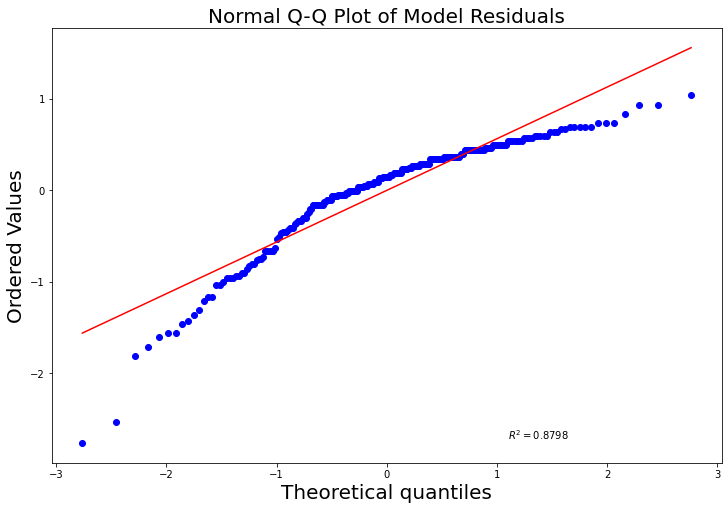

In [68]:
#Check normality assumption
fig = plt.figure(figsize= (12, 8))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(brands_lm.resid, plot= plt, rvalue= True)
ax.set_title("Normal Q-Q Plot of Model Residuals", fontsize= 20)
ax.set

plt.show()

__Shapiro Test of Normality__

In [51]:
scipy.stats.shapiro(brands_lm.resid)

ShapiroResult(statistic=0.8820493817329407, pvalue=9.701676311271723e-13)

### Equal Variance Assumption
The boxplots below (same boxplot graphic as shown above) suggests that, although the means may differ between the brands, the variances are roughly equal, with Breyers having a slightly larger variance than the other brands. Using Levene's Test of Equal Variances, we find that these differences are not significant at the $\alpha = 0.05$ significance level with _p_ = 0.624. Having met this assumption and relaxing the normality assumption, we proceed with caution to ad-hoc analysis.

__Boxplots by Brand__

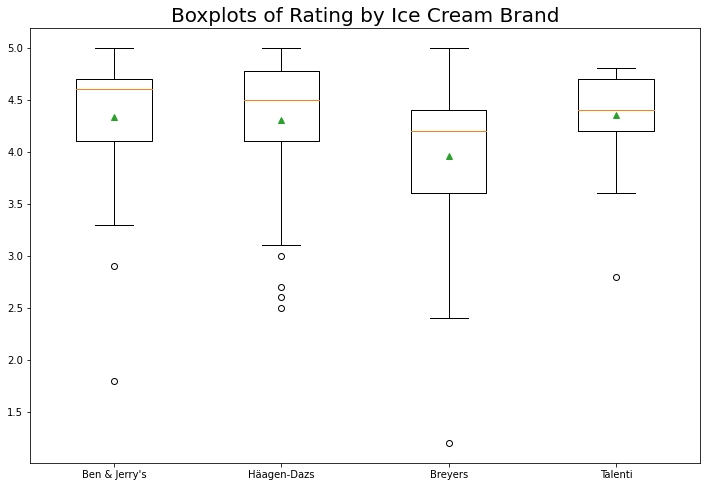

In [73]:
data_boxplot = [data['rating'][data['brand'] == 'bj'],
                data['rating'][data['brand'] == 'hd'],
                data['rating'][data['brand'] == 'breyers'],
                data['rating'][data['brand'] == 'talenti']]


fig = plt.figure(figsize= (12, 8))
ax = fig.add_subplot(111)

ax.boxplot(data_boxplot,
           labels= ['Ben & Jerry\'s', 'Häagen-Dazs', 'Breyers', 'Talenti'],
           showmeans= True)
ax.set_title("Boxplots of Rating by Ice Cream Brand", fontsize= 20)
plt.show()

__Levene's Test of Equal Variance__

In [52]:
stats.levene(data['rating'][data['brand'] == 'bj'],
             data['rating'][data['brand'] == 'hd'],
             data['rating'][data['brand'] == 'breyers'],
             data['rating'][data['brand'] == 'talenti'])

LeveneResult(statistic=2.472976498629979, pvalue=0.062353809916256095)

### Tukey's Honest Significant Difference Test
To determine which ice cream brands have significantly different ratings, we conduct Tukey's HSD test, an ad-hoc test which determines the direction and significance of differences between groups. As we might expect from our exploratory analyses, Breyers ice cream has significantly lower ratings than other ice cream brands with ratings between 0.34 to 0.39 points lower than other brands. No other brands have significantly different ratings.

In [78]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['rating'],
                          groups=data['brand'],
                          alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
     bj breyers  -0.3693 0.0039 -0.6478 -0.0907   True
     bj      hd  -0.0244    0.9 -0.3021  0.2532  False
     bj talenti    0.024    0.9 -0.2863  0.3343  False
breyers      hd   0.3448 0.0047  0.0808  0.6088   True
breyers talenti   0.3932 0.0042  0.0951  0.6914   True
     hd talenti   0.0484    0.9 -0.2489  0.3457  False
------------------------------------------------------


### ANOVA Conclusions
Although all brands have flavors that have received high ratings from consumers, as a brand, Breyers ice cream performs signficantly worse than other ice cream brands. This may be due to consumer perception of Breyers as a household, grocery store brand which is sold primarily in 1.5 quart packages, whereas the other brands are best known for their pint size specialty ice creams. These single serving options (or two servings, depending on the consumer) may be perceived as a particular treat and receive higher ratings, while Breyers ice cream remains an economical, everyday ice cream option.